# Lab 8: Strings and Regular Expressions




In [ ]:
install.packages("babynames")
install.packages("htmlwidgets")
library(tidyverse)
library(babynames)
library(htmlwidgets)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## String Basics

You've seen strings a lot before in this class. Generally, anything with either two single quotes (') or double quotes (") marks around it is a string. In this lab, we are going to cover ways to manipulate strings and extract useful information from them.

We are going to use a small subset of the `sentences` dataset to show how `stringr` functions work. Make sure to run the code below!

In [ ]:
small_sentences <- sentences[1:10]
small_sentences

[1] "The birch canoe slid on the smooth planks." 
 [2] "Glue the sheet to the dark blue background."
 [3] "It's easy to tell the depth of a well."     
 [4] "These days a chicken leg is a rare dish."   
 [5] "Rice is often served in round bowls."       
 [6] "The juice of lemons makes fine punch."      
 [7] "The box was thrown beside the parked truck."
 [8] "The hogs were fed chopped corn and garbage."
 [9] "Four hours of steady work faced us."        
[10] "A large size in stockings is hard to sell."

### raw strings

To generate strings that containing single or double quotes gets confusing with the rules that anything marks around single or double quotes is a string. We can use backslashes to handle this as the following example:

In [ ]:
double_quote <- "\"A sentence marked around by double quotes.\""
single_quote <- "\'A sentence marked around by single quotes.\'"
single_quote2 <- "'A sentence marked around by single quotes.'"
str_view(double_quote)
str_view(single_quote)
str_view(single_quote2)

[1] │ "A sentence marked around by double quotes."

[1] │ 'A sentence marked around by single quotes.'

[1] │ 'A sentence marked around by single quotes.'

In [ ]:
# Following examples are incorrect
# double_quote2 <- '"A sentence marked around by double quotes."'
# single_quote3 <- ''A sentence marked around by single quotes.''
# str_view(double_quote2)

To eliminate the escaping, you can instead use a raw string.

In [ ]:
raw_double_quote = r"("A sentence marked around by double quotes.")"
raw_single_quote = r"('A sentence marked around by single quotes.')"
str_view(raw_double_quote)
str_view(raw_single_quote)

[1] │ "A sentence marked around by double quotes."

[1] │ 'A sentence marked around by single quotes.'

A raw string usually starts with `r"(` and finishes with `)"`. But if your string contains `)` you can instead use `r"[]"` or `r"{}"`, and if that’s still not enough, you can insert any number of dashes to make the opening and closing pairs unique, e.g., `r"--()--"`, `r"---()---"`, etc.

For instance, we want to generate sentence: \\
A sentence contains bracket and double quote.)"

In [ ]:
bracket_sentence = r"--(A sentence contains bracket and double quote.)")--"
str_view(bracket_sentence)

[1] │ A sentence contains bracket and double quote.)"

### str_c

`str_c` concatenates two (or more) strings together. For example:

In [ ]:
s1 <- "01"
s2 <- '02'
s3 <- "1999"

str_c(s1, s2, s3)

[1] "01021999"

Note that the strings we chose here actually represent a date: January 2nd, 1999. If we wanted to write this data in a MM/DD/YYYY format, we can use the `sep` parameter in `str_c` to include a character that separates each one of our three strings:

In [ ]:
str_c(s1, s2, s3, sep = "/")

[1] "01/02/1999"

### str_detect

`str_detect(string, pattern)` returns TRUE or FALSE depending on if the specified pattern is in the string or not. For example:

In [ ]:
str_detect("STATS 306", "STATS")

[1] TRUE

Like most R functions, `str_detect` works with vectors in addition to single strings. Take a look at what happens when we use `str_detect` with the small_sentences dataset we created. Here, we are checking which sentences contain the string "in".

In [ ]:
str_detect(small_sentences, "in")

[1] FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE

If we want to quickly check which of the objects in our small_sentences vector contained this string, we can subset our small_sentences vector as follows:

In [ ]:
small_sentences[str_detect(small_sentences, "in")]

[1] "Rice is often served in round bowls."      
[2] "The juice of lemons makes fine punch."     
[3] "A large size in stockings is hard to sell."

Note that the middle sentence doesn't actually contain the word "in"! It's included because it has the word "fine" which contains the string "in". If we want to check for a specific word, we can include spaces around the word. Note: this won't work if the word has any punctuation around it, so be careful about that. We will discuss ways to deal with this more when we talk about regular expressions.

In [ ]:
small_sentences[str_detect(small_sentences, " in ")]

[1] "Rice is often served in round bowls."      
[2] "A large size in stockings is hard to sell."

### str_sub

Useful for extracting subsets of strings. For example:

In [ ]:
s <- "This is an example string"
str_sub(s, start = 1, end = 4) #returns first 4 characters in string

str_sub(s, start = 2, end = 8) #returns second character through 8th

str_sub(s, start = -5, end = -1) #you can also index with negative values to count from the end of the string

[1] "This"

[1] "his is "

[1] "tring"

### str_to_lower, str_to_upper, and str_replace

`str_to_lower` and `str_to_upper` change all characters in the string to lowercase or uppercase, respectively. This is useful if you need to use another stringr function but want to ignore case. `str_replace(string, pattern, replacement)` replaces the first instance of the pattern in the string with the replacement character. The replacement character can be an empty string, so this is also a way to remove certain characters. `str_replace_all` follows the same format but replaces all instances of the pattern.

In [ ]:
str_to_lower("STATS 306")

[1] "stats 306"

In [ ]:
str_replace("This sentence, which is a string, has two commas!", ",", "")

[1] "This sentence which is a string, has two commas!"

In [ ]:
str_replace_all("This sentence, which is a string, has two commas!", ",", "")

[1] "This sentence which is a string has two commas!"

Since stringr is a package in the tidyverse, it works nicely with all of the tidyverse functions you've already learned. We can see how this works with the `babynames` dataset:

In [ ]:
head(babynames)

year,sex,name,n,prop
<dbl>,<chr>,<chr>,<int>,<dbl>
1880,F,Mary,7065,0.07238359
1880,F,Anna,2604,0.02667896
1880,F,Emma,2003,0.02052149
1880,F,Elizabeth,1939,0.01986579
1880,F,Minnie,1746,0.01788843
1880,F,Margaret,1578,0.01616720


For example, how many names are there in each year that contain the string "beth" (like Elizabeth, Beth, Annabeth, etc)? We can use `str_detect` with our other tidyverse functions to learn this.

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


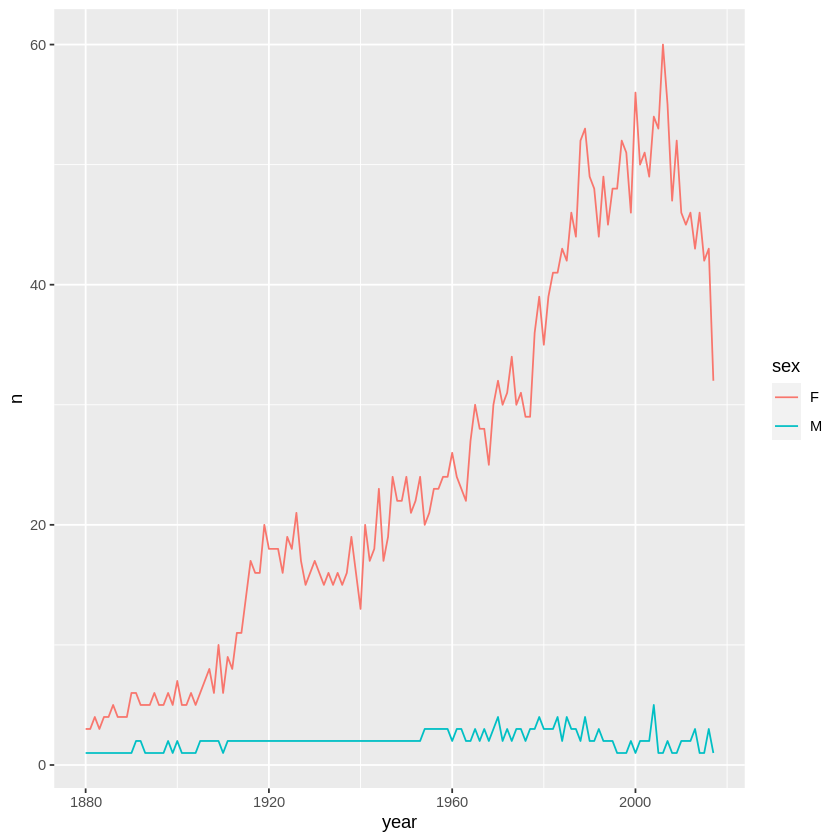

In [ ]:
babynames %>%
  mutate(name = str_to_lower(name)) %>%
  filter(str_detect(name, "beth")) %>%
  group_by(year, sex) %>%
  summarize(n = n()) %>%
  ggplot(aes(x = year, y =n, color = sex)) + geom_line()

Typically, a function like `str_detect` which returns T/F values might be used within a filter function to remove rows where the value in a column does not contain the pattern. Many other stringr functions (like str_to_lower, str_to_upper, str_replace) that return a modified version of the string work best when used with a `mutate` command.


### str_glue

`str_glue` helps you to generate sentence that mixed by fixed and variables strings without breaking into substrings via `str_c`. This function is a wrapper around `glue()` in `glue` package.

In [ ]:
babynames %>%
  mutate(name = str_to_lower(name)) %>%
  distinct(name) %>%
  head() %>%
  mutate(greeting = str_glue("Hi {name}!")) %>%
  mutate(greeting2 = str_c("Hi ", name, "!"))

name,greeting,greeting2
<chr>,<glue>,<chr>
mary,Hi mary!,Hi mary!
anna,Hi anna!,Hi anna!
emma,Hi emma!,Hi emma!
elizabeth,Hi elizabeth!,Hi elizabeth!
minnie,Hi minnie!,Hi minnie!
margaret,Hi margaret!,Hi margaret!


### str_flatten

If you need a stringr function within a summarize command, `str_flatten` is a good place to start. It always returns a single string. For example, what if we wanted a column that included all of the names that included the string "auren" for 2001, with each name separated by a comma? We can do this with `str_flatten`:

In [ ]:
babynames %>%
  mutate(name = str_to_lower(name)) %>%
  filter(str_detect(name, "auren"), year == 2001) %>%
  group_by(sex) %>%
  summarize(names = str_flatten(name, ", "))

sex,names
<chr>,<chr>
F,"lauren, laurena, mauren"
M,"laurence, lauren, laurent, laurencio, laurentino, laurenz"


There are many more useful functions which we don't have time to go through in this lab! Take a look at this "cheat sheet" for more useful `stringr` functions: https://evoldyn.gitlab.io/evomics-2018/ref-sheets/R_strings.pdf

## Stringr Exercises

1. Across all years, how many unique names contain the string "anna" and the letter "e"?
2. How common is the letter E in female names? For each year, compute the average number of Es per name for female babies. Produce an appropriate graph to show this metric.

*Hint 1: Remember that you probably need to use `str_to_lower` so you don't miss the capital Es at the beginning of each name.* \
*Hint 2: Try computing the number of Es in each name using the `str_count` function. Then use `group_by` and `summarize` as usual to compute the average number of Es in each name in each year.*

3. Challenge Exercise: For names longer than 4 characters, extract the first four characters of the name. How many of these substrings are also names in the babynames dataset?

*Hint 1: Use `str_length` to filter to names longer than 4 characters.* \
*Hint 2: Use a `stringr` function convered above to extract the first four characters and store them in another column in your dataframe. You can use `distinct()` on this column to return a df of distinct 4 character substrings.* \

*Hint 3: Try using a join find how many of the substrings are also names in the babynames dataset.*

## Regular Expressions

Regular expressions are a step above regular stringr functions, and let us speficify more complicated patterns in strings we want to identify. For example, here are some questions we can answer with regular expressions but might be harder or not possible with other `stringr` functions:

1. How many names in babynames are there that start with the letter A, have three other letters, and then another A?
2. How many sentences in our `sentences` dataset contain the word "fall"? We can easily identify sentences with the word "fall" with no punctuation, but what if fall is the last word? What if there are other punctuation marks around it?

We will show how to solve these questions using regular expressions a little bit later.

We will use a subset of names from the `babynames` dataset as an example.

In [ ]:
names_small <- babynames %>%
  head(100) %>%
  mutate(name = str_to_lower(name)) %>%
  pull(name)
names_small

[1] "mary"      "anna"      "emma"      "elizabeth" "minnie"    "margaret" 
  [7] "ida"       "alice"     "bertha"    "sarah"     "annie"     "clara"    
 [13] "ella"      "florence"  "cora"      "martha"    "laura"     "nellie"   
 [19] "grace"     "carrie"    "maude"     "mabel"     "bessie"    "jennie"   
 [25] "gertrude"  "julia"     "hattie"    "edith"     "mattie"    "rose"     
 [31] "catherine" "lillian"   "ada"       "lillie"    "helen"     "jessie"   
 [37] "louise"    "ethel"     "lula"      "myrtle"    "eva"       "frances"  
 [43] "lena"      "lucy"      "edna"      "maggie"    "pearl"     "daisy"    
 [49] "fannie"    "josephine" "dora"      "rosa"      "katherine" "agnes"    
 [55] "marie"     "nora"      "may"       "mamie"     "blanche"   "stella"   
 [61] "ellen"     "nancy"     "effie"     "sallie"    "nettie"    "della"    
 [67] "lizzie"    "flora"     "susie"     "maud"      "mae"       "etta"     
 [73] "harriet"   "sadie"     "caroline"  "katie"     "lydia"     "elsie"    
 [79] "kate"      "susan"     "mollie"    "alma"      "addie"     "georgia"  
 [85] "eliza"     "lulu"      "nannie"    "lottie"    "amanda"    "belle"    
 [91] "charlotte" "rebecca"   "ruth"      "viola"     "olive"     "amelia"   
 [97] "hannah"    "jane"      "virginia"  "emily"

Let's start with the very basics: we can select all matches that contain the pattern "i":

In [ ]:
names_small[str_detect(names_small, "i")]

[1] "elizabeth" "minnie"    "ida"       "alice"     "annie"     "nellie"   
 [7] "carrie"    "bessie"    "jennie"    "julia"     "hattie"    "edith"    
[13] "mattie"    "catherine" "lillian"   "lillie"    "jessie"    "louise"   
[19] "maggie"    "daisy"     "fannie"    "josephine" "katherine" "marie"    
[25] "mamie"     "effie"     "sallie"    "nettie"    "lizzie"    "susie"    
[31] "harriet"   "sadie"     "caroline"  "katie"     "lydia"     "elsie"    
[37] "mollie"    "addie"     "georgia"   "eliza"     "nannie"    "lottie"   
[43] "viola"     "olive"     "amelia"    "virginia"  "emily"

### Regular Expressions Quantifiers:

Quantifiers are regular expressions that specify how many times a pattern can match. They apply to the character directly before them. Some important quantifiers are:

`?` matches 0 or 1 time \
`*` matches 0 or more times \
`+` matches 1 or more times \
`{n}` matches exactly n times \
`{n,}` matches at least n times. \
`{n,m}` matches between n and m times.\

To see these in action, we can see what names are returned when we look for the pattern "i" followed by differing restrictions on the letter n.  

In [ ]:
names_small[str_detect(names_small, "in?")] #contains "i" followed by an optional n

[1] "elizabeth" "minnie"    "ida"       "alice"     "annie"     "nellie"   
 [7] "carrie"    "bessie"    "jennie"    "julia"     "hattie"    "edith"    
[13] "mattie"    "catherine" "lillian"   "lillie"    "jessie"    "louise"   
[19] "maggie"    "daisy"     "fannie"    "josephine" "katherine" "marie"    
[25] "mamie"     "effie"     "sallie"    "nettie"    "lizzie"    "susie"    
[31] "harriet"   "sadie"     "caroline"  "katie"     "lydia"     "elsie"    
[37] "mollie"    "addie"     "georgia"   "eliza"     "nannie"    "lottie"   
[43] "viola"     "olive"     "amelia"    "virginia"  "emily"

In [ ]:
names_small[str_detect(names_small, "in+")] #i followed by at least 1 n

[1] "minnie"    "catherine" "josephine" "katherine" "caroline"  "virginia"

In [ ]:
names_small[str_detect(names_small, "in{2}")] #i followed by exactly 2 n s

[1] "minnie"

## Special Characters

Certain characters in R also indicate other patterns. If you want to match any of these characters explicitly, you need to put a backslash (`\`) in front of it. For example, to match a period, you would use `\.` instead of `.`. Some special characters are:

`.` matches any character \
`\d` matches any digit \
`\D` matches any non-digit \
`\w` matches any word character \
`\W` matches any non-word character

Note: for all but on the first one on this list, you will have to add another backslash to use them. See the example!

There are a lot more of these, see https://evoldyn.gitlab.io/evomics-2018/ref-sheets/R_strings.pdf for a more comprehensive list.

Some examples of how these work:

This matches all names that have an 'a', followed by three other characters, and another 'a':

In [ ]:
names_small[str_detect(names_small, "a.{3}a")]

[1] "martha"

In [ ]:
names_small[str_detect(names_small, "a\\w{3}a")] #returns the same thing, since the three characters were word characters

[1] "martha"

In [ ]:
str_detect("STATS306", "\\d{3}") # detects whether the string contains 3 digits

[1] TRUE

## Character Classes

What if you want to match any one of a set of characters? You can surround characters in brackets [] to match any one of the characters in the group. For example, if you want to match any vowel, you would use `[aeiou]`. Add `^` to the beginning to match characters except these. For example, to match non-vowels, you would use `[^aeiou]`.

Now that we've learned this, we know how to answer our second example question: How many sentences in our `sentences` dataset contain the word "fall"? We can easily identify sentences with the word "fall" with no punctuation, but what if fall is the last word? What if there are other punctuation marks around it?

In [ ]:
sentences[str_detect(sentences, "fall")]

[1] "The soft cushion broke the man's fall."     
[2] "Leaves turn brown and yellow in the fall."  
[3] "The petals fall with the next puff of wind."
[4] "The heap of fallen leaves was set on fire."

This gets us all sentences with the string "fall" contained in it. However, note that this means we also include a sentence with "fallen", which we don't want. We can try adding spaces around "fall" to fix this:

In [ ]:
sentences[str_detect(sentences, " fall ")]

[1] "The petals fall with the next puff of wind."

What happens here? We correctly do not return the sentence with "fallen", but we also lost the two sentences that end with the word "fall". This is because there's a period after "fall" so we don't match the pattern " fall ". We can try:

In [ ]:
sentences[str_detect(sentences, " fall[ .]{1}")]

[1] "The soft cushion broke the man's fall."     
[2] "Leaves turn brown and yellow in the fall."  
[3] "The petals fall with the next puff of wind."

Here, we match sentences that have a space, the word "fall", and then either a space or a period, repeated exactly once. This works!

However, what if we wanted a regular expression that worked no matter what type of punctuation was around the word? For example, we also want to match the following two sentences:
1. Leaves turn brown and yellow in the fall!
2. Sarah's favorite season is fall, even though she hates colder temperatures.  

We can use

In [ ]:
fall <- c("Leaves turn brown and yellow in the fall!", "Sarah's favorite season is fall, even though she hates colder temperatures.")

fall[str_detect(fall, " fall[ .]{1}")] #old solution doesn't work on the new sentences

character(0)

In [ ]:
fall[str_detect(fall, "fall[:punct:]*")]

[1] "Leaves turn brown and yellow in the fall!"                                  
[2] "Sarah's favorite season is fall, even though she hates colder temperatures."

This works! Here, `[:punct]` matches any punctuation. The `*` after it means that we want to match strings with the word "fall" followed by 0 or more punctuation characters.

## Anchors

To match the start of the string, use `^` \\
To match the end of the string, use `$`

For example, to get all sentences starting with the word "These", we can use:

In [ ]:
sentences[str_detect(sentences, "^These")]

[1] "These days a chicken leg is a rare dish."   
[2] "These thistles bend in a high wind."        
[3] "These pills do less good than others."      
[4] "These coins will be needed to pay his debt."

To find all sentences ending the "fall.", we can use:

In [ ]:
sentences[str_detect(sentences, "fall.$")]

Note that since every sentence ends with a period in `sentences`, we need to include `.` as well.

In [ ]:
sentences[str_detect(sentences, "fall$")]

## Regular Expression Exercises

1. How many names given to boys in 2000 started and ended with the letter A?
*Hint: In addition to using anchors, you'll also have to use a special character and a quantifier to specify that there can be any number of other characters between the A at the beginning of the name and the a at the end of the name.*  

2. How many names given to girls in 2008 started with a consonant and was followed by exactly 2 (and no more) vowels?

*Hint: After making sure that the name starts with a consonant and is followed by two vowels, make sure that the next character is a consonant.*